In [1]:
#!pip install emmv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.dates as mdates
%matplotlib inline
%matplotlib widget
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.tsa.stattools import adfuller
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import matplotlib.pyplot as plt
from matplotlib import pyplot
#import plotly.graph_objs as go
#init_notebook_mode(connected=True)
import eif as iso
from functions import load_dataset,calc_percent_NAs, adfuller_test,data_load
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
data = load_dataset("anomaly2.csv")
data

name,Flow,P_1,P_3,P_4,P_5,T_2,T_3,T_4
Datetime,,,,,,,,
2021-03-09 09:30:00,47138.159180,2.165137,2.269474,1.526311,NaN,21.400453,21.358465,21.196192
2021-03-09 09:30:01,47242.440033,2.165406,2.269932,1.526997,1.039878,NaN,21.359150,21.194819
2021-03-09 09:30:02,47147.847748,2.165675,2.270618,NaN,NaN,21.408683,NaN,21.195505
2021-03-09 09:30:03,47182.094193,2.165406,2.270160,NaN,NaN,21.410054,NaN,21.185207
2021-03-09 09:30:04,47177.315140,2.164868,2.269703,NaN,NaN,NaN,NaN,21.184521
...,...,...,...,...,...,...,...,...
2021-03-09 15:00:20,45631.868362,2.025729,2.174818,1.547113,NaN,28.692819,28.760795,28.582740
2021-03-09 15:00:21,45606.905365,2.025190,2.173903,1.546656,1.036908,28.692134,NaN,NaN
2021-03-09 15:00:22,45454.487228,2.025998,2.175046,NaN,NaN,NaN,28.760110,NaN


In [3]:
#### Lets see missing values 
missing = calc_percent_NAs(data)
cols = data.columns
index = pd.to_datetime(data.index,utc = True)
##Missing values imputation
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
data = imp.fit_transform(data)
data = pd.DataFrame(data, columns=cols, index = index)
data

[IterativeImputer] Completing matrix with shape (19527, 8)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.09
[IterativeImputer] Change: 479.6695671666633, scaled tolerance: 47.357470321655306 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.18
[IterativeImputer] Change: 751.2046214850418, scaled tolerance: 47.357470321655306 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.26
[IterativeImputer] Change: 628.8283380861627, scaled tolerance: 47.357470321655306 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.35
[IterativeImputer] Change: 164.6130685064587, scaled tolerance: 47.357470321655306 
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.44
[IterativeImputer] Change: 170.44619987227082, scaled tolerance: 47.357470321655306 
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.53
[IterativeImputer] Change: 45.388158930235306, scaled tolerance: 47.357470321655306 
[IterativeImputer] Early stopping

name,Flow,P_1,P_3,P_4,P_5,T_2,T_3,T_4
Datetime,,,,,,,,
2021-03-09 09:30:00+00:00,47138.159180,2.165137,2.269474,1.526311,1.040243,21.400453,21.358465,21.196192
2021-03-09 09:30:01+00:00,47242.440033,2.165406,2.269932,1.526997,1.039878,21.397820,21.359150,21.194819
2021-03-09 09:30:02+00:00,47147.847748,2.165675,2.270618,1.526725,1.040177,21.408683,21.371127,21.195505
2021-03-09 09:30:03+00:00,47182.094193,2.165406,2.270160,1.525567,1.040110,21.410054,21.366174,21.185207
2021-03-09 09:30:04+00:00,47177.315140,2.164868,2.269703,1.524919,1.040300,21.391791,21.356004,21.184521
...,...,...,...,...,...,...,...,...
2021-03-09 15:00:20+00:00,45631.868362,2.025729,2.174818,1.547113,1.037631,28.692819,28.760795,28.582740
2021-03-09 15:00:21+00:00,45606.905365,2.025190,2.173903,1.546656,1.036908,28.692134,28.762384,28.576539
2021-03-09 15:00:22+00:00,45454.487228,2.025998,2.175046,1.547139,1.037642,28.690106,28.760110,28.575396


In [4]:
sca = StandardScaler()

index = data.index
data = sca.fit_transform(data)

data = pd.DataFrame(data, index=index, columns=cols)

data = data.diff().dropna()


In [5]:
data

name,Flow,P_1,P_3,P_4,P_5,T_2,T_3,T_4
Datetime,,,,,,,,
2021-03-09 09:30:01+00:00,0.160272,0.007749,0.019560,0.059746,-0.230986,-0.001251,0.000321,-0.000644
2021-03-09 09:30:02+00:00,-0.145381,0.007749,0.029340,-0.023643,0.189173,0.005163,0.005602,0.000322
2021-03-09 09:30:03+00:00,0.052634,-0.007749,-0.019560,-0.100927,-0.042014,0.000652,-0.002316,-0.004832
2021-03-09 09:30:04+00:00,-0.007345,-0.015498,-0.019560,-0.056412,0.120082,-0.008681,-0.004757,-0.000322
2021-03-09 09:30:05+00:00,-0.088610,0.007749,0.021536,0.240728,-0.153338,0.001690,0.001612,0.000644
...,...,...,...,...,...,...,...,...
2021-03-09 15:00:20+00:00,0.263900,0.007749,0.042558,0.333886,0.312953,-0.002934,-0.000962,-0.000322
2021-03-09 15:00:21+00:00,-0.038366,-0.015498,-0.039120,-0.039830,-0.457480,-0.000326,0.000743,-0.002910
2021-03-09 15:00:22+00:00,-0.234256,0.023247,0.048900,0.042146,0.464429,-0.000964,-0.001064,-0.000537


In [10]:
def find_eps(X, n):     # find the appropriate eps value for min_samples value (n = min_samples-1), (min_samples > D*2 (D = dimension))
    from sklearn.neighbors import NearestNeighbors
    nbrs = NearestNeighbors(n_neighbors=n).fit(X)
    distances, indices = nbrs.kneighbors(X)
    X['knn_farthest_dist'] = distances[:, -1]
    X_plot = X.sort_values('knn_farthest_dist', ascending=False).reset_index()['knn_farthest_dist']
    #X_plot = X_plot.iloc[0:100]
    X_plot.plot()
    plt.xlabel('index')
    plt.ylabel('distance')
    plt.grid(True)
    plt.show()
    X.drop(columns = 'knn_farthest_dist', inplace=True)

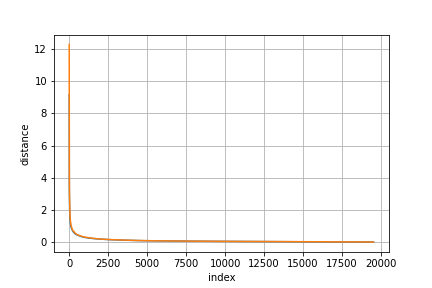

In [11]:
find_eps(data,15)

# The distance value at the elbow point should be taken as eps. Here it is around 0.5.

In [16]:
# To find the optimum min_samples and eps combination

'''for min_samples in [16]:
    for eps in np.linspace(0.5,0.6, 10):
        clf = DBSCAN(eps=eps, min_samples=min_samples)
        pred = clf.fit_predict(data)
        print("sil_score: ", silhouette_score(data,pred), "eps: ", eps, "min_samples: ", min_samples)
        '''

sil_score:  0.6808577161821268
sil_score:  0.5722737742913251
sil_score:  0.6808577161821268


In [ ]:
clf = DBSCAN(eps=0.5, min_samples=16)
pred = clf.fit_predict(data)

In [ ]:
#print(silhouette_score(data, pred))

In [ ]:
final_data = data.copy()
final_data["Date"] = data.index
final_data["anomaly"] = pred

outliers=final_data.loc[final_data['anomaly']==-1]
outlier_index=list(outliers.index)

In [ ]:
outliers

In [ ]:
outliers1 = outliers.copy()

In [ ]:
 #Get the anomalies that appear consecutively, for instance three seconds in a row

outliers["date_delta"] = outliers["Date"] - outliers["Date"].shift()

keep = outliers.date_delta < pd.Timedelta(61,unit = "s")
outliers = outliers.set_index("Date")
outliers = outliers.loc[keep]
index = outliers
outliers = outliers.reset_index()

##Get only the number of anomalies that you want. For instance, take the first one when there are 3 anomalies in three consecutive seconds 
cond = outliers1["Date"].isin(outliers["Date"])
outliers1.drop(outliers1[cond].index,inplace = True)
outliers1


In [ ]:
outliers1.to_csv("anomaly_dbscan")

In [ ]:
final_data.reset_index(drop = True,inplace = True)

outliers=final_data[pred==-1]
outlier_index=list(outliers.index)

pca = PCA(n_components=3)
data_reduced = pca.fit_transform(data)
data = pd.DataFrame(data_reduced)

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)
ax.scatter(data.iloc[:,0], data.iloc[:,1], color = 'green')
ax.scatter(data.iloc[outlier_index,0],data.iloc[outlier_index,1], color='red')


In [ ]:
# To see a certain data point on the plot as big blue 'X'

from datetime import datetime

time = final_data['Date'].apply(lambda x: x.strftime("%H:%M:%S"))

cond = pd.np.where(time.str.contains('13:22'))

x = final_data.iloc[cond]


In [ ]:
fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)
ax.scatter(data.iloc[:,0], data.iloc[:,1], color = 'green')
ax.scatter(data.iloc[outlier_index,0],data.iloc[outlier_index,1], color='red')
ax.scatter(x.iloc[:,0],x.iloc[:,1], color='blue', marker= 'x', linewidths= 20)